In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datos/bank-full.csv')

In [3]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14536,33,services,divorced,secondary,no,437,yes,no,cellular,15,jul,184,2,-1,0,unknown,no
41820,70,retired,married,secondary,no,1310,no,no,cellular,15,oct,634,1,-1,0,unknown,no
43121,40,technician,married,secondary,no,826,no,no,unknown,24,feb,174,1,267,2,other,no
23990,41,technician,divorced,secondary,no,88,no,no,cellular,29,aug,88,2,-1,0,unknown,no


1- Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [4]:
descriptores = df.describe()
descriptores

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
medianas = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].median()
df_medianas = pd.DataFrame(medianas)
df_medianas.T

,age,balance,day,duration,campaign,pdays,previous
0,39.0,448.0,16.0,180.0,2.0,-1.0,0.0


In [6]:
modas = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].mode()
modas

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


- Percentiles 25, 75

    - Los sacamos con el describe, pero hacemos un ejemplo con age

In [7]:
per25 = np.percentile(df['age'], 25)
print(per25)
per75 = np.percentile(df['age'], 75)
print(per75)

33.0
48.0


- Rango Intercualtílico

    - El rango intercuartílico es la diferencia entre el Q3 (75) y el Q1(25)

In [8]:
# IQR de edad:
IQR_edad = per75 - per25
IQR_edad

15.0

- Boxplot de algunas variables

In [9]:
var_numericas = descriptores.columns
var_numericas

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<AxesSubplot:xlabel='age'>

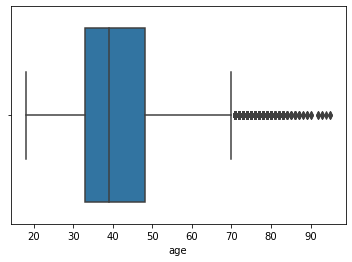

In [10]:
sns.boxplot(x = df['age'], data = df)

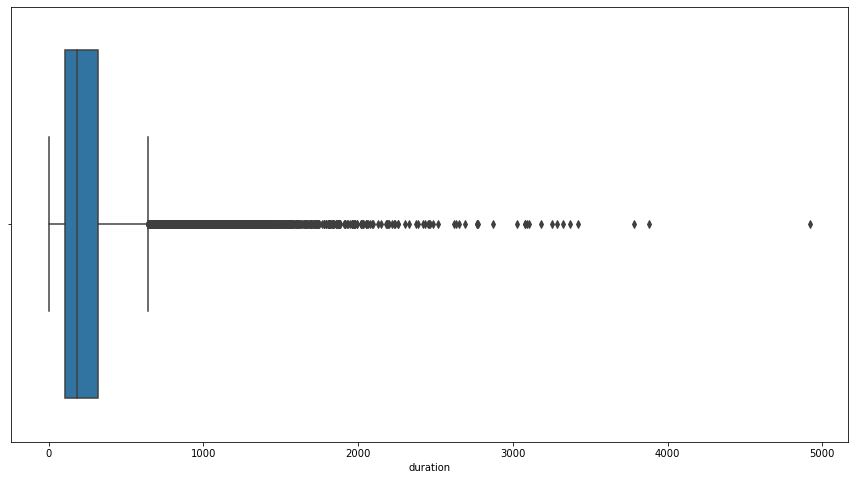

In [28]:
plt.figure(figsize = (15,8))

fig = sns.boxplot(x ='duration', data = df)

plt.show()

<AxesSubplot:xlabel='balance'>

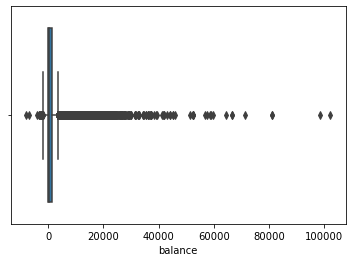

In [12]:
sns.boxplot(x = df['balance'], data = df)

- Tabla de frecuencias
    - Variables cualitativas
    - Variables cuantitativas
    - Frecuencia acumulada
    - Representación de al menos una tabla de frecuencias

In [13]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29157,46,blue-collar,divorced,primary,no,216,no,no,cellular,2,feb,173,1,-1,0,unknown,no
20492,47,unemployed,married,tertiary,no,0,no,no,cellular,12,aug,232,5,-1,0,unknown,no
33843,47,management,divorced,tertiary,no,0,no,no,cellular,28,apr,186,2,-1,0,unknown,no


In [14]:
trabajos = df.groupby(df['job'])['age'].count()
df_trabajos = pd.DataFrame(trabajos)
df_trabajos

,age
job,
admin.,5171
blue-collar,9732
entrepreneur,1487
housemaid,1240
management,9458
retired,2264
self-employed,1579
services,4154
student,938


In [15]:
df_trabajos['frec_relativa'] = df_trabajos['age']/df.shape[0]
df_trabajos

,age,frec_relativa
job,,
admin.,5171,0.114375
blue-collar,9732,0.215257
entrepreneur,1487,0.032890
housemaid,1240,0.027427
management,9458,0.209197
retired,2264,0.050076
self-employed,1579,0.034925
services,4154,0.091880
student,938,0.020747


In [16]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [99]:
df['duracion_llamada'] = pd.cut(df['duration'], bins = (0,103,319,515,4918), labels = ('corta', 'media', 'larga', 'excesiva'))

In [105]:
df[['duration', 'duracion_llamada']].sample(15)

,duration,duracion_llamada
27516,39,corta
12675,425,larga
1223,200,media
44171,817,excesiva
41269,41,corta
37470,221,media
2625,119,media
25675,20,corta
10063,1159,excesiva
28413,219,media


In [101]:
df['duracion_llamada'].value_counts().reset_index()

,index,duracion_llamada
0,media,22575
1,corta,11372
2,larga,6181
3,excesiva,5080


In [62]:
df['duracion_llamada'].count()

45208

In [29]:
np.percentile(df['duration'], 25)

103.0

In [30]:
np.percentile(df['duration'], 75)

319.0

2- Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Continuando el análisis iniciado en el ejercicio de estadística 1 respecto a la duracion de la llamada, comprobamos de manera gráfica mediente boxplot que la intuición de que la mayoría de las llamadas se encontrarían distribuidas alrededor de los 100 y los 300 seg (nos fijamos en los Q1 y Q3) y la gran heterogeneidad de los datops vendría por la existencia de un alto numero de llamadas que hemos categorizado como 'excesivas', que serian los outliers o 'datos atípicos'.